# Sistema de controle do CTA pulsado

In [1]:
include("../src/ThermistorHW.jl")
using ThermistorHW
using Plots
gr()

Plots.GRBackend()

In [112]:
include("cta-pulsed.jl")

CTA

In [113]:
Rt = Thermistor(5000, 3000)
Tw = 85.0
cta = CTA.PulsedCTA(Rt)
Rw = Rt(Tw)
htrans = CTA.HeatTrans(Tw)

CTA.HeatTrans(85.0, 0.002, 20.0, 93.0, 1.2566370614359172e-5, ThermistorHW.Solid(5242.0, 650.6, 0.58), 2.195763825349026e-5, 0.014285639447720764)

In [114]:
u = 0.2:0.1:20.0
hamcp1 = CTA.hamcpfun.(htrans, u, 0.0, 25);
hamcp2 = CTA.hamcpfun.(htrans, u, 0.0, Tw);


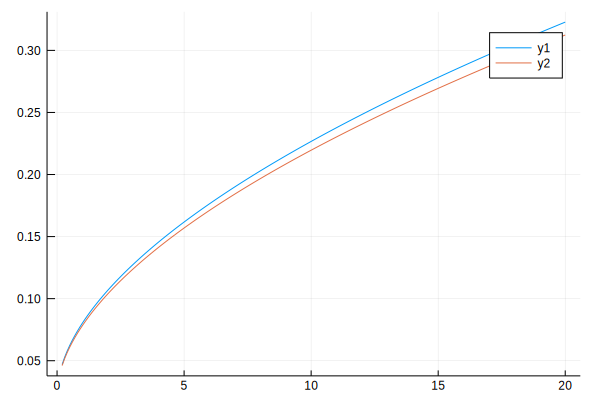

In [115]:
plot(u, hamcp1)
plot!(u, hamcp2)

In [116]:
CTA.hamcpfun(htrans, 10, 85)

0.21958766977015984

In [117]:
function ctacontrol(T, htrans, cta, vel, β₀, t, dt=0.02)
    
    mcp = htrans.mcp
    Tw = htrans.Tw
    Ta = htrans.Ta
    R = cta.Rt(T)
    Ri = cta.Ri
    Vi = cta.Vi
    
    x2 = ( (Tw-T)/dt + β₀*(T-Ta) ) * (R + Ri)^2 * mcp / (Vi*Vi*R)
    if (x2 > 1.0)
        x = 1.0
    elseif x2 <  0.0
        x = 0.0
    else
        x = sqrt(x2)
    end
    
    β = CTA.hamcpfun(htrans, vel, t, T)
    
    der = -β*(T-Ta) + R/(R+Ri)^2 * x2 * Vi^2/mcp
    
    I = x*Vi/(R+Ri)
    Eo = Ri * I
    T1 = der*dt + T
    
    return x, T1, β, Eo
end

function ctacontrol2(T, htrans, cta, vel, β₀, t, dt=0.02)
    
    mcp = htrans.mcp
    Tw = htrans.Tw
    Ta = htrans.Ta
    R = cta.Rt(T)
    Rw = cta.Rt(Tw)
    Ri = cta.Ri
    Vi = cta.Vi
    
    x2 = ( (Tw-T)/dt + β₀*(T-Ta) ) * (Rw + Ri)^2 * mcp / (Vi*Vi*Rw)
    if (x2 > 1.0)
        x = 1.0
    elseif x2 <  0.0
        x = 0.0
    else
        x = sqrt(x2)
    end
    
    β = CTA.hamcpfun(htrans, vel, t, T)
    
    der = -β*(T-Ta) + R/(R+Ri)^2 * x2 * Vi^2/mcp
    
    I = x*Vi/(R+Ri)
    Eo = Ri * I
    T1 = der*dt + T
    
    return x, T1, β, Eo
end


ctacontrol2 (generic function with 2 methods)

In [121]:
t = 0.0
dt = 0.02
ttot = 20.0
n = Int(ceil(ttot / dt ))
β = zeros(n)
Tw = zeros(n)
Eo = zeros(n)
x = zeros(n);
t = zeros(n);

vel = CTA.VelUpDown(5.0, 10.0)

CTA.VelUpDown(10.0, 12.0, 18.0, 5.0)

In [132]:
tt = 0.0
T0 = htrans.Ta
for i = 1:n
    x[i], T0, β[i], Eo[i] = ctacontrol2(T0, htrans, cta, vel, 0.15, tt, dt)
    Tw[i] = T0
    
    t[i] = tt
    tt += dt
end    

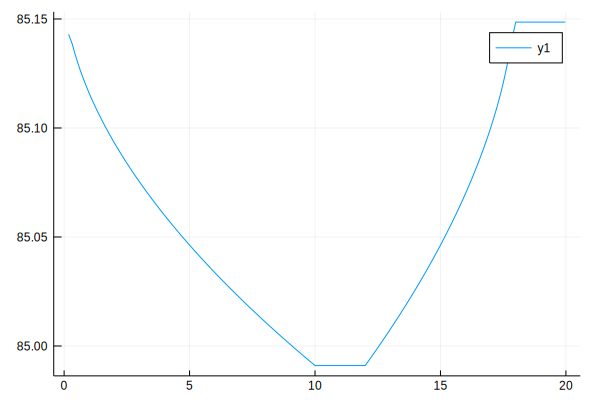

In [131]:
plot(t[10:end], Tw[10:end])

In [111]:
x[255]

0.5930607020002184

In [108]:
t[251]

4.999999999999981

In [129]:
temperature(Rt, 1000)

74.7071074288607

In [133]:
htrans.mcp


0.014285639447720764

In [147]:
Rw1 = 1000.0
Ri = 100.0
Vi = 24.0
(Rw1 + Ri)^2/(Vi^2*Rw1) * htrans.mcp * 0.15

0.004501464513474511

In [148]:
1100^2 / (24^2 * 1000) * htrans.mcp * 0.15


0.004501464513474511

In [146]:
Rw1

1000.0